In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
from core import PACKAGE_ROOT
import warnings
import cmd
import textwrap
warnings.filterwarnings('ignore')
from collections import Counter
from plots import plot_distribution, allplots

In [3]:
#Location of data files
train_data_loc = PACKAGE_ROOT / 'data/train.csv'
test_data_loc = PACKAGE_ROOT / 'data/test.csv'

#reading data files
train_data = pd.read_csv(train_data_loc)
test_data = pd.read_csv(test_data_loc)

In [4]:
print(train_data.head(2))
print('-'*50)
print('- number of records in the dataset :', len(train_data))
print('- Number of unique customers :', train_data.CustomerId.nunique())

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0      0.0              2        1.0             0.0        181449.97       0  
1      0.0              2        1.0             1.0         49503.50       0  
--------------------------------------------------
- number of records in the dataset : 165034
- Number of unique customers : 23221


In [5]:
#checking for null values
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Analysing Credit Score

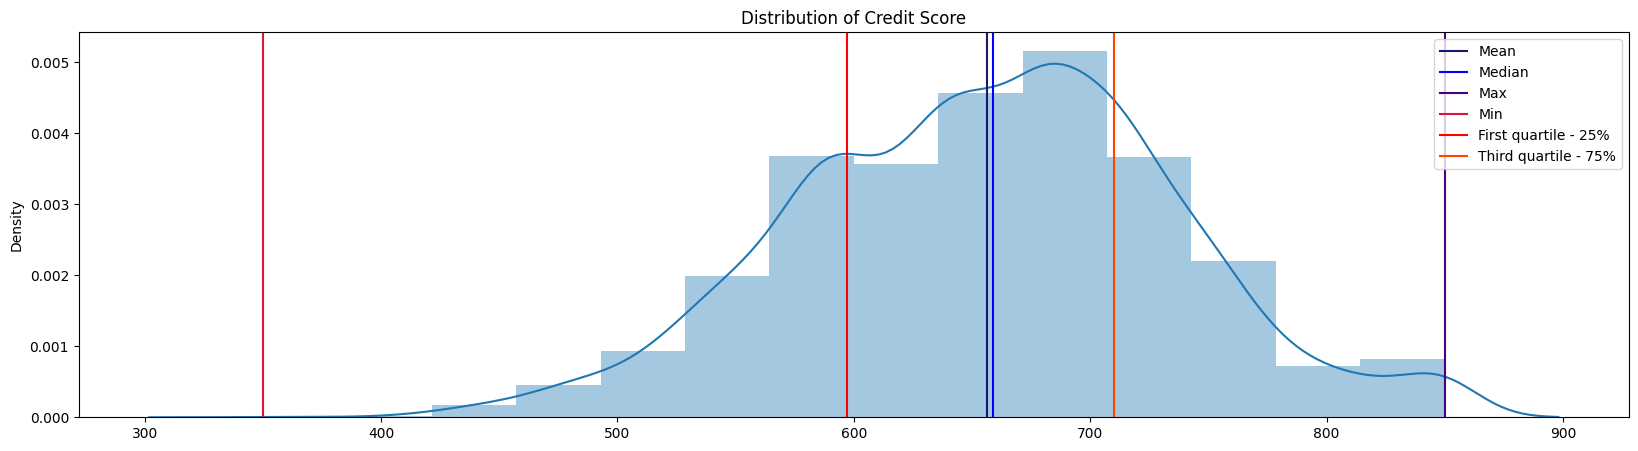

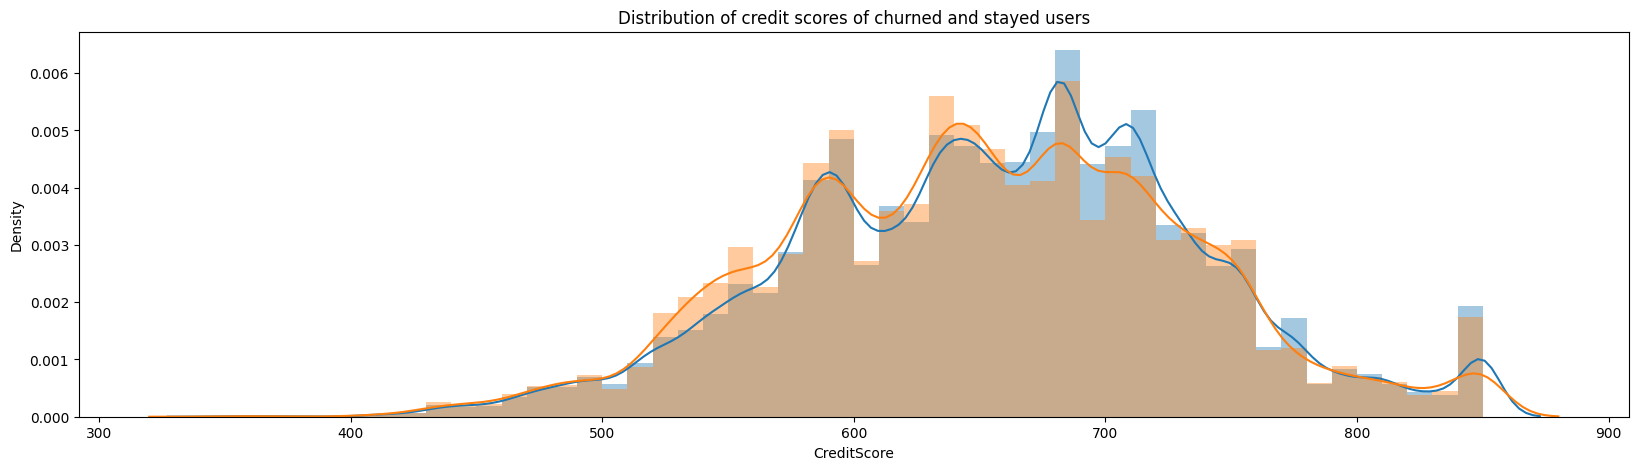

In [30]:
plot_distribution(train_data.CreditScore, plt_title='Distribution of Credit Score', figsize=(20,5))
plt.figure(figsize=(20,5))
plt.title('Distribution of credit scores of churned and stayed users')
sn.distplot(train_data.CreditScore[train_data.Exited == 0])
sn.distplot(train_data.CreditScore[train_data.Exited == 1])
plt.show()

Observations:
* Credit score varies from 300 to 900.
* Data is skewed towards left.
* Mean and median are very near to each other even though there is skew
* Not much difference in credit score distribution of churned and non churned users

##### Geography

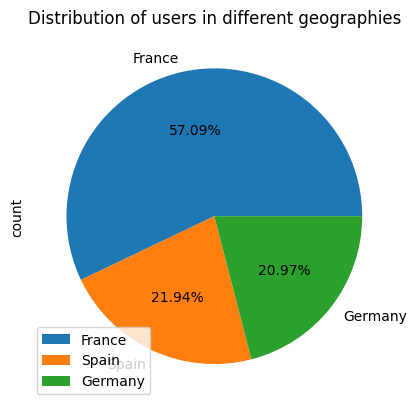

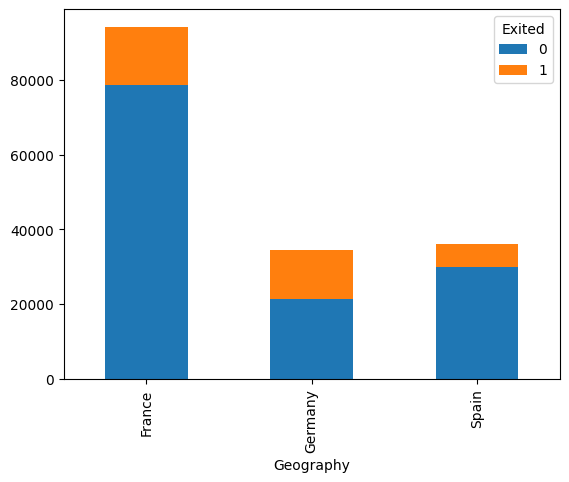

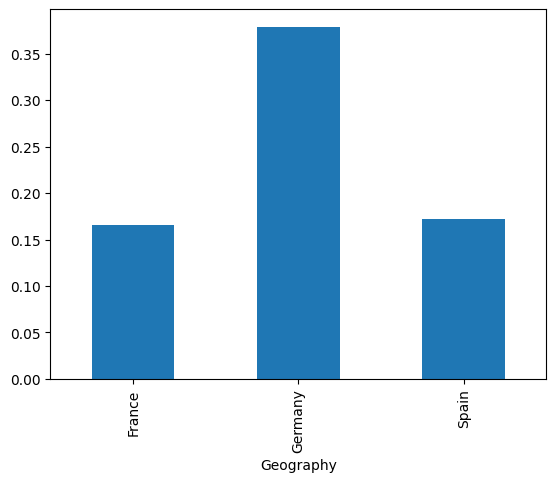

In [29]:
title = 'Distribution of users in different geographies'
allplots(data = train_data.Geography, title = title, kind='piecountplot')
plt.title('Distribution of churned and stayed users in different geographies')
train_data.groupby(['Geography', 'Exited']).size().unstack().plot(kind='bar', stacked=True)
plt.show()
plt.title('Ratio of churned users ratio accross different geographies')
train_data.groupby(['Geography']).Exited.mean().plot(kind='bar')
plt.show()

* We can see more than half of the users are from France.
* German users are not very happy with the service, so more likely to churn out.

##### Gender

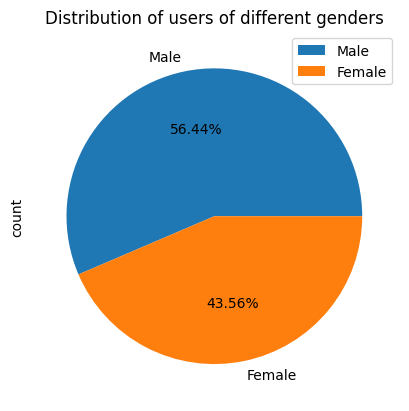

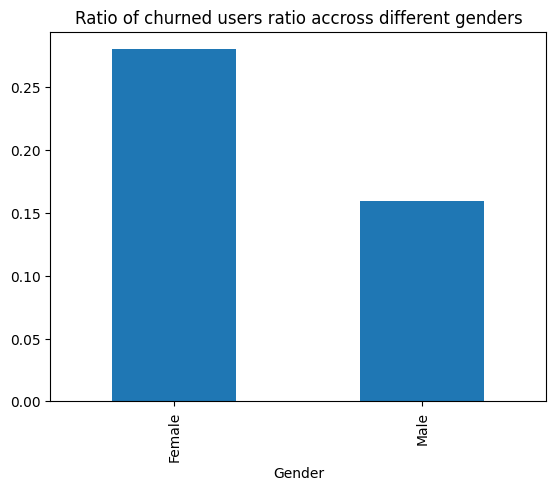

In [33]:
title = 'Distribution of users of different genders'
allplots(data = train_data.Gender, title = title, kind='piecountplot')
plt.figure()
plt.title('Ratio of churned users ratio accross different genders')
train_data.groupby(['Gender']).Exited.mean().plot(kind='bar')
plt.show()

* There are more male customers.
* Women are more likely to churn out.

##### Age  

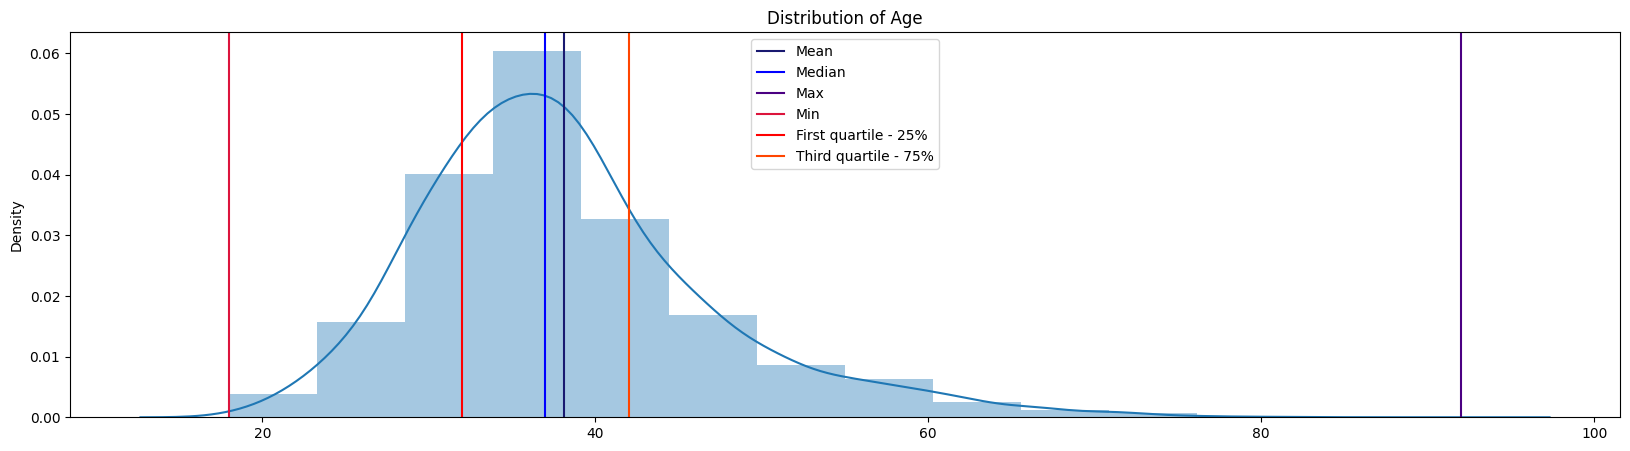

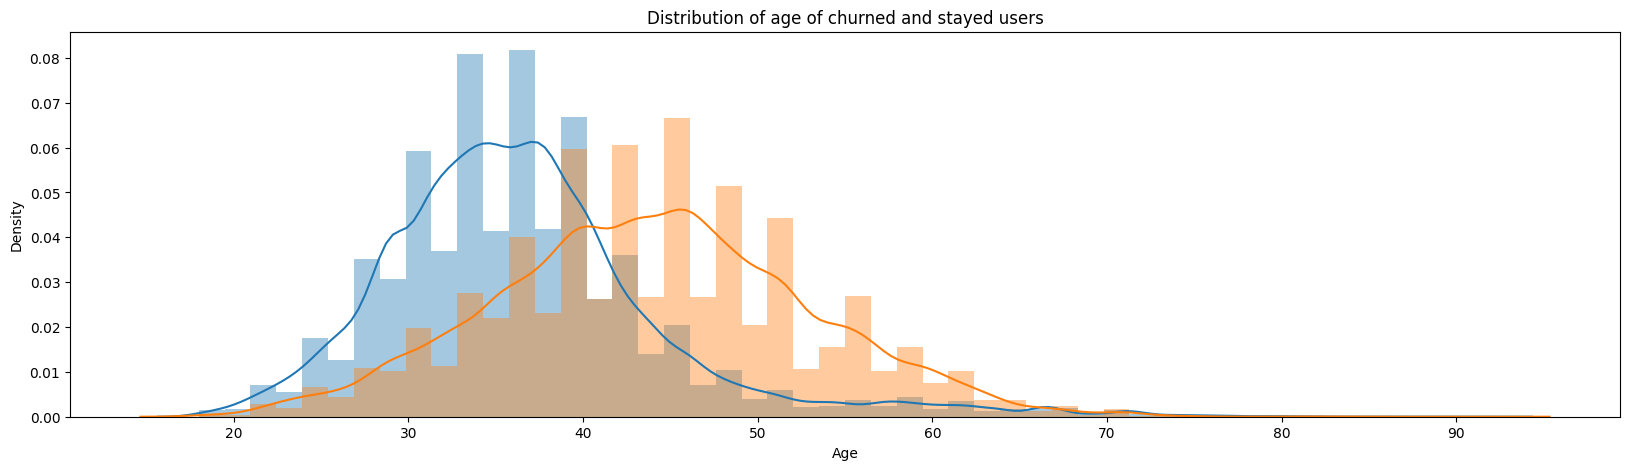

In [34]:
plot_distribution(train_data.Age, plt_title='Distribution of Age', figsize=(20,5))
plt.figure(figsize=(20,5))
plt.title('Distribution of age of churned and stayed users')
sn.distplot(train_data.Age[train_data.Exited == 0])
sn.distplot(train_data.Age[train_data.Exited == 1])
plt.show()

* Age is a right skewed feature (There are more youngesters)
* Young users are more likely to stay and older users are more likely to churn out

##### Tenure

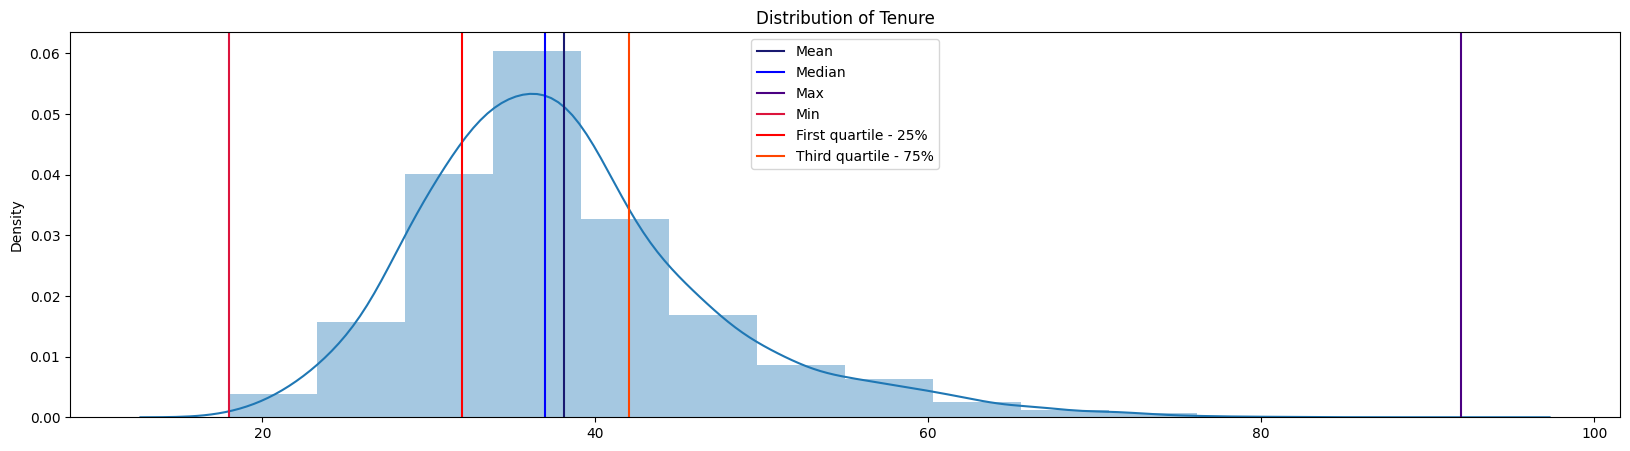

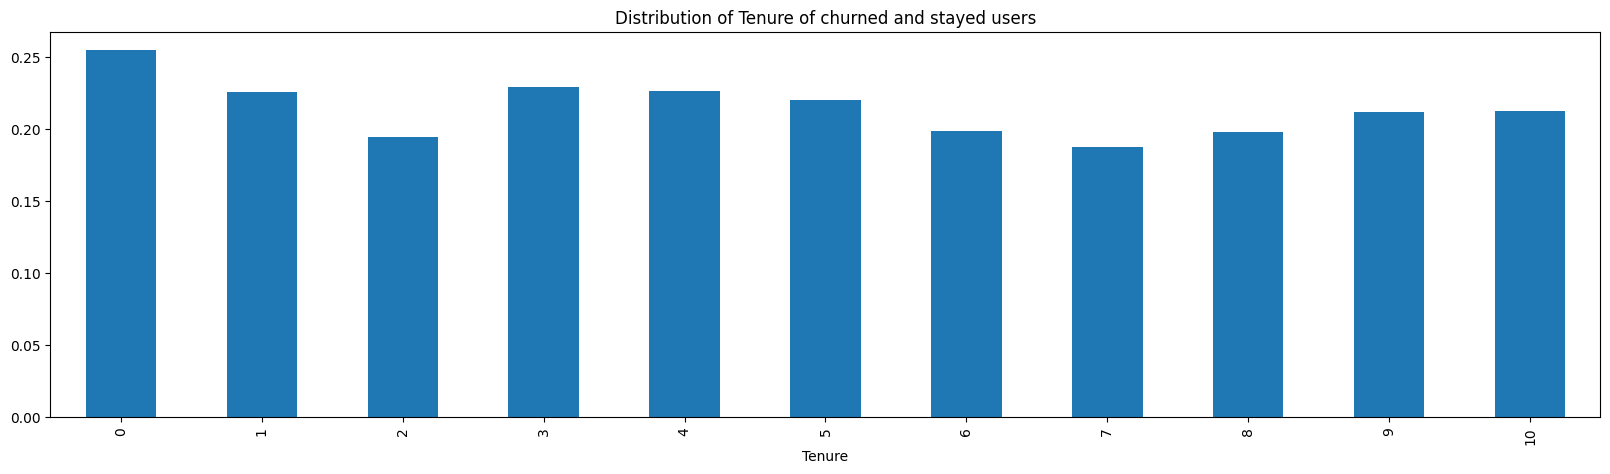

In [38]:
plot_distribution(train_data.Age, plt_title='Distribution of Tenure', figsize=(20,5))
plt.figure(figsize=(20,5))
plt.title('Distribution of Tenure of churned and stayed users')
train_data.groupby(['Tenure']).Exited.mean().plot(kind='bar')
plt.show()

* As expected Tenure is skewed to right, (There are more new customers than the older ones)
* The churn ratio has remained the same accross different tenures.

##### Balance

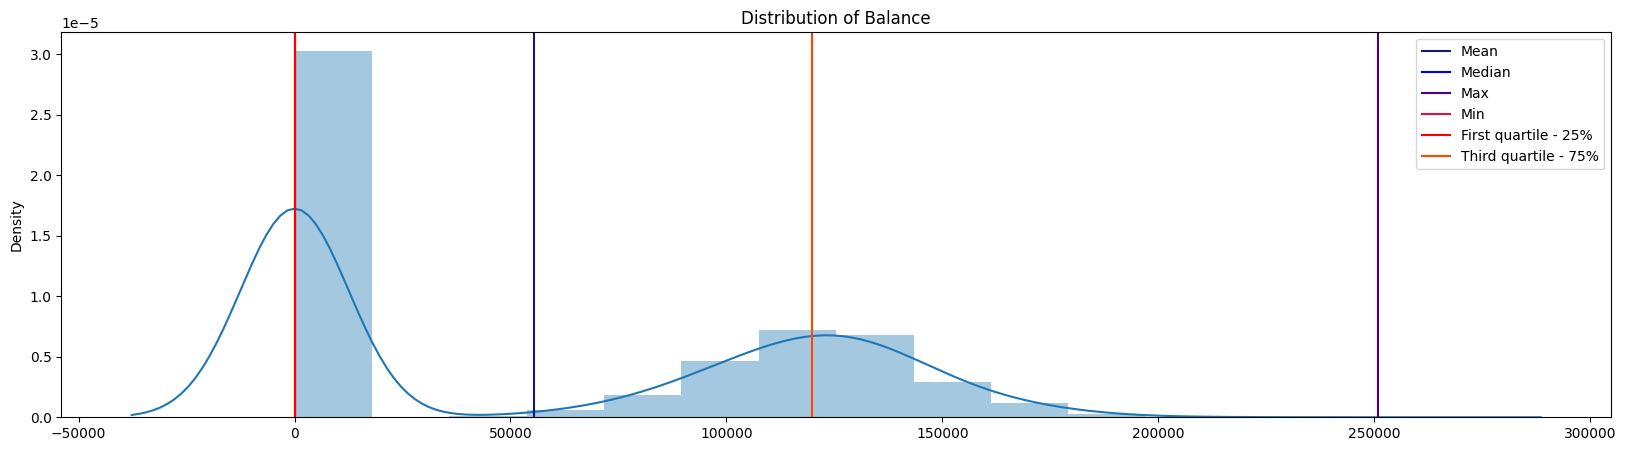

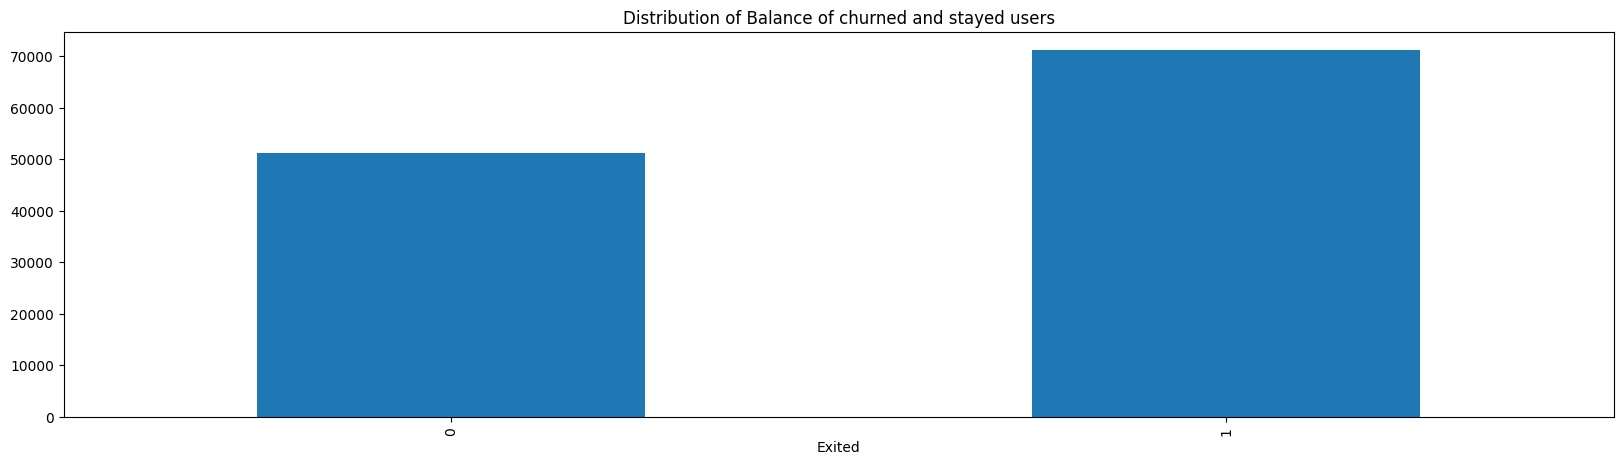

In [49]:
plot_distribution(train_data.Balance, plt_title='Distribution of Balance', figsize=(20,5))
plt.figure(figsize=(20,5))
plt.title('Distribution of Balance of churned and stayed users')
train_data.groupby(['Exited']).Balance.mean().plot(kind='bar')
plt.show()

* On an average churned out users had more balance, so we are loosing more valuable customers

##### NumOfProducts

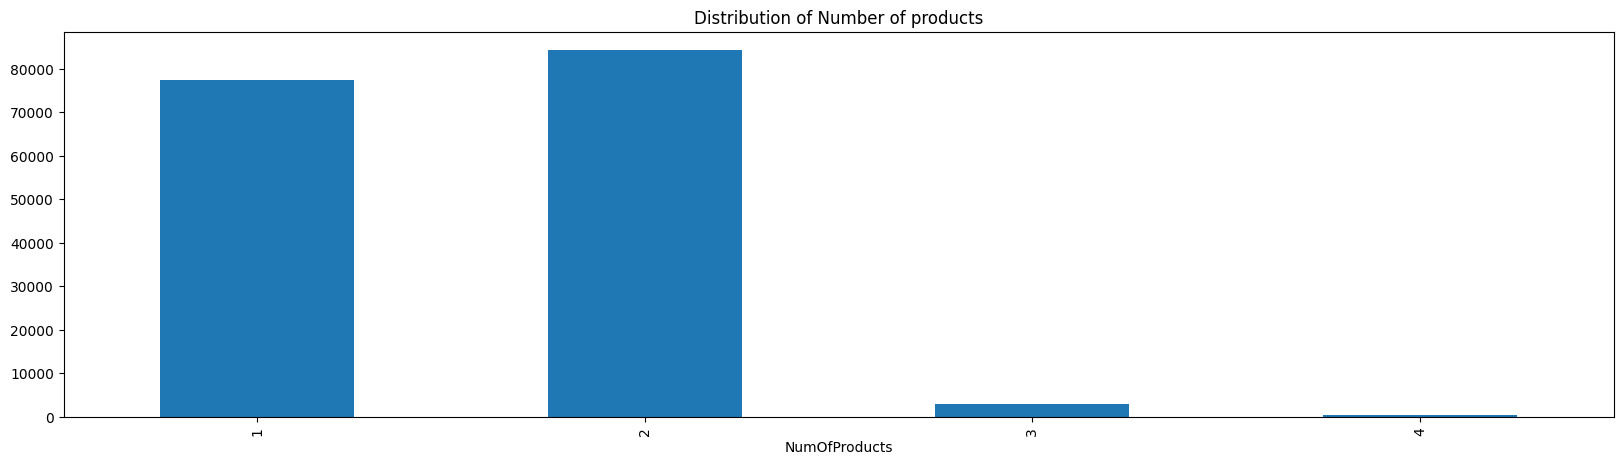

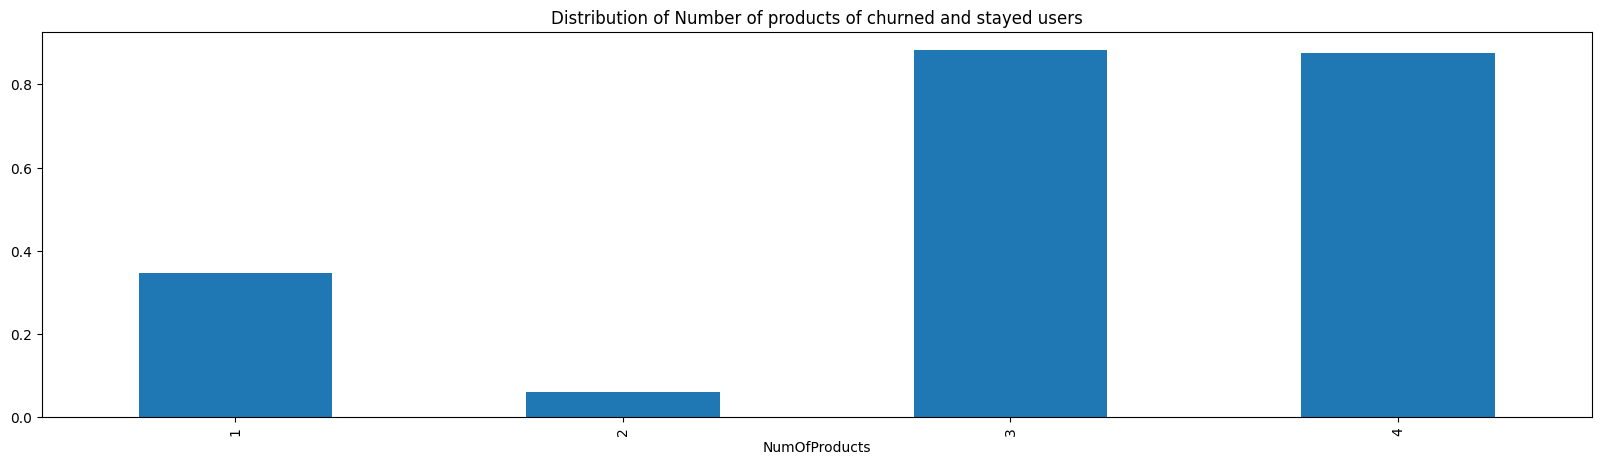

In [44]:
plt.figure(figsize=(20,5))
plt.title('Distribution of Number of products')
train_data.groupby(['NumOfProducts']).Exited.count().plot(kind='bar')
plt.show()
plt.figure(figsize=(20,5))
plt.title('Distribution of Number of products of churned and stayed users')
train_data.groupby(['NumOfProducts']).Exited.mean().plot(kind='bar')
plt.show()

* There are very less users holding products more than 2

##### HasCrCard

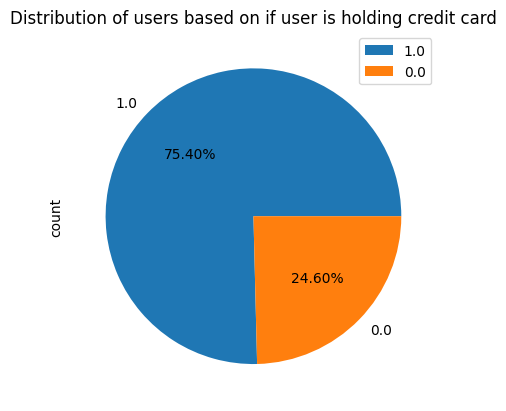

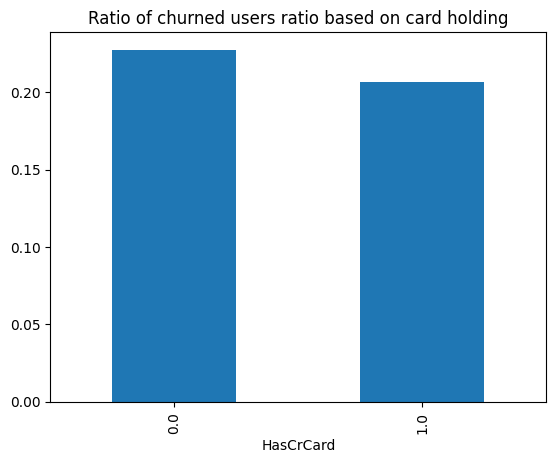

In [46]:
title = 'Distribution of users based on if user is holding credit card'
allplots(data = train_data.HasCrCard, title = title, kind='piecountplot')
plt.figure()
plt.title('Ratio of churned users ratio based on card holding')
train_data.groupby(['HasCrCard']).Exited.mean().plot(kind='bar')
plt.show()

* More than 3/4th of users have credit cards and users with credit card are more likely to stay

##### IsActiveMember

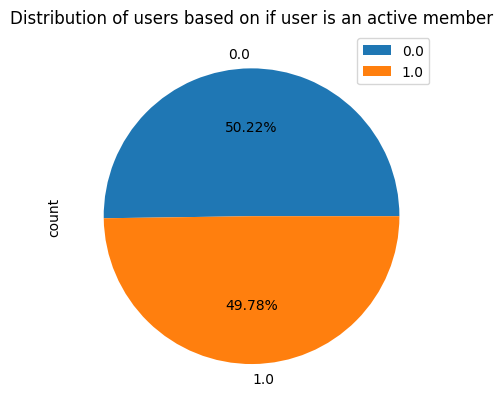

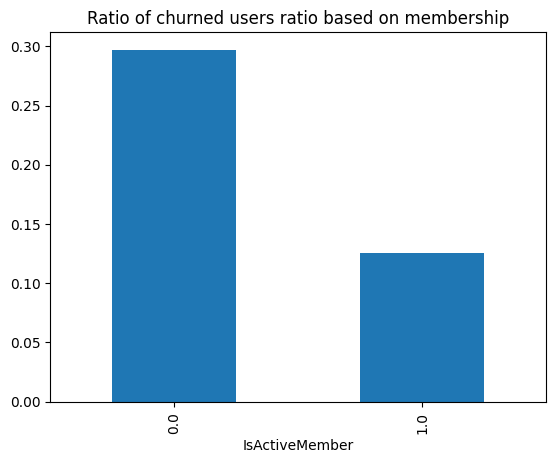

In [47]:
title = 'Distribution of users based on if user is an active member'
allplots(data = train_data.IsActiveMember, title = title, kind='piecountplot')
plt.figure()
plt.title('Ratio of churned users ratio based on membership')
train_data.groupby(['IsActiveMember']).Exited.mean().plot(kind='bar')
plt.show()

* Only half of the users are active.
* Active member is very likely to stay than a non active member.

##### EstimatedSalary

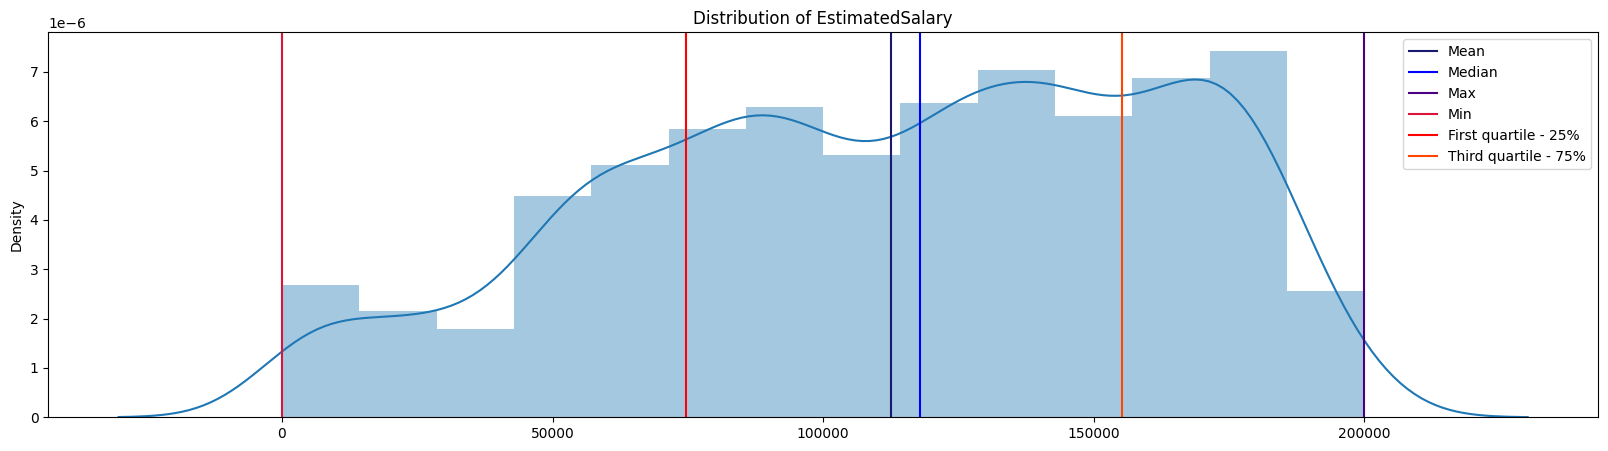

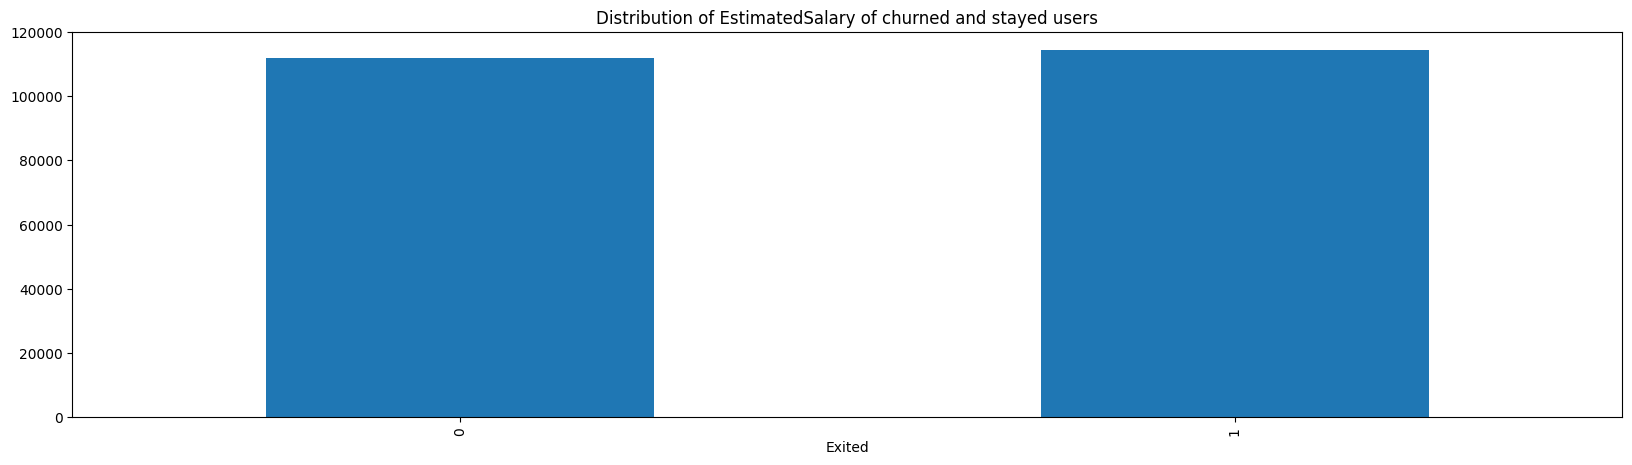

In [48]:
plot_distribution(train_data.EstimatedSalary, plt_title='Distribution of EstimatedSalary', figsize=(20,5))
plt.figure(figsize=(20,5))
plt.title('Distribution of EstimatedSalary of churned and stayed users')
train_data.groupby(['Exited']).EstimatedSalary.mean().plot(kind='bar')
plt.show()

* Estimated salary seems to have no affect on exited column

##### Correlated features

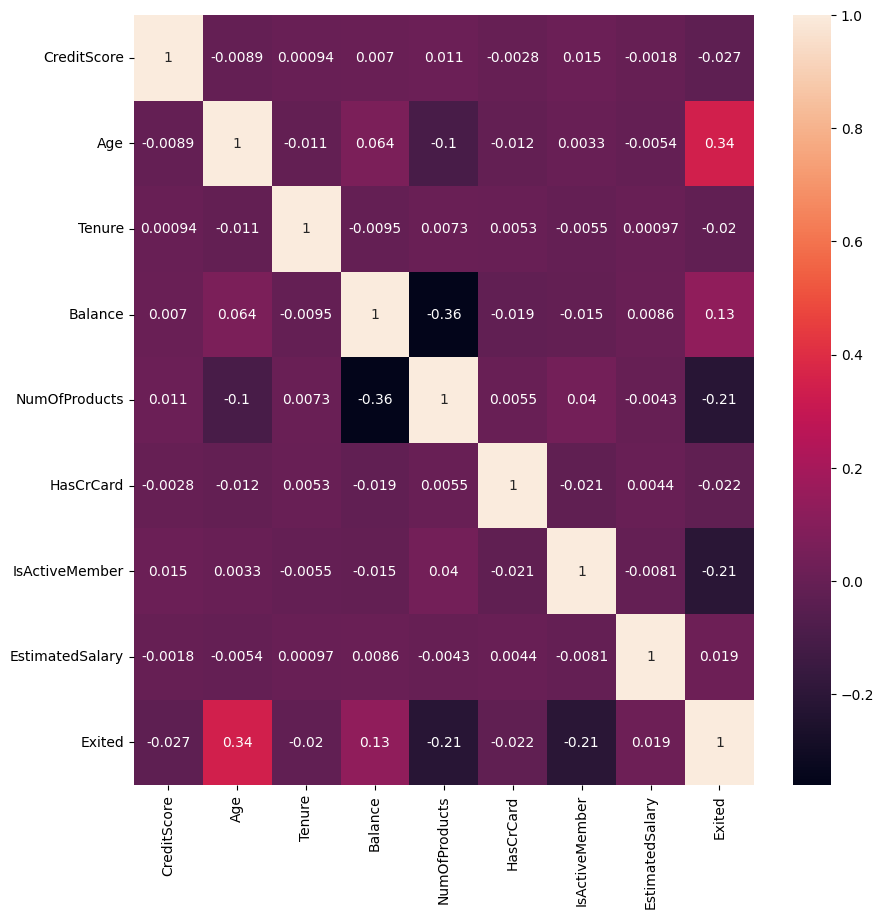

In [58]:
plt.figure(figsize=(10,10))
sn.heatmap(train_data[['CreditScore',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']].corr(), annot=True)
plt.show()

* We cann see none of the feature is correlated